In [445]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['notebook','grid'])

# Regularization for univariate linear regression

In [446]:
np.random.seed(1)
X_train = np.arange(0,20)
y_train = 3*X_train+2+np.random.normal(1,0.5,(X_train.shape[0],))

Our function to test is y= 3x+2

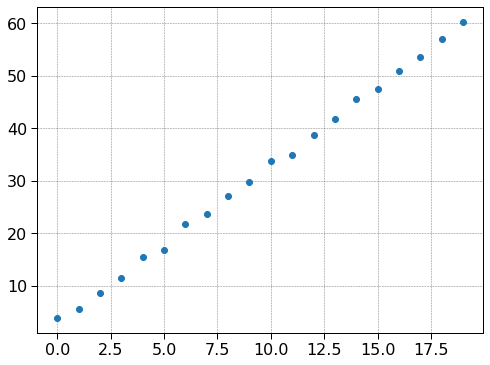

In [447]:
plt.plot(X_train, y_train,'o')

Gradient for parameter w
\
$
\frac{\partial J}{\partial w} =\frac{ X^T*(\hat{Y}-y)+\sum w}{m}
$

In [517]:
def Gradient(X, y, w):
    fx = X.dot(w)
    error = fx-y
    return (np.sum((X.T.dot(error)).reshape(-1,1),axis = 0)+np.sum(w.reshape(-1,1),axis = 0))/X.shape[0]

Example

In [518]:
np.random.seed(1)
w = np.random.rand(2)
X_temp = np.concatenate((np.ones((X_train.shape[0],1)), X_train.reshape(-1,1)), axis = 1) #We add vector 1s to the X matrix
Gradient(X_temp,y_train,w)

array([-329.42302285])

Cost Function
$
J = \frac{\sum (\hat{Y}-Y)^2+\sum (w^2)}{2m}
$

In [519]:
def Cost(X, y, w):
    fx = X.dot(w)
    error = fx - y
    return 1/(2*X.shape[0])*(np.sum(error**2)+np.sum(w**2))

In [520]:
Cost(X_temp, y_train, w)

378.42470616402636

Gradient Descent

$
w = w - \frac{\alpha}{m}*\frac{\partial J}{\partial w}
$

In [521]:
def GD(X, y, w_in, lamb, alpha):
    w = w_in
    J = []
    m = X.shape[0]
    J.append(Cost(X,y,w))
    for i in range(40000):
        dj_dw = Gradient(X,y,w)
        w = w*(1-alpha*lamb/m)-alpha/m*dj_dw
        J.append(Cost(X,y,w))
    return w, J

In [522]:
np.random.seed(1)
w = np.random.rand(2)
X_temp = np.concatenate((np.ones((X_train.shape[0],1)), X_train.reshape(-1,1)), axis = 1)
w, J = GD(X_temp, y_train, w, 1, 0.0001)

In [523]:
w

array([2.74130243, 2.98962538])

In [524]:
def f_lin(x):
    return w[0]+w[1]*x

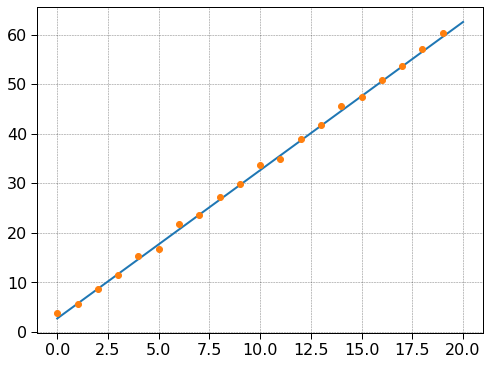

In [525]:
x_test = np.linspace(0,20,100)
plt.plot(x_test, f_lin(x_test))
plt.plot(X_train, y_train,'o')

# Regularization for Multiple variable Linear Regression

In [526]:
x_train = np.linspace(0,20,20)
y_train = np.linspace(0,20,20)
X,Y = np.meshgrid(x_train, y_train)

In [527]:
X.shape

(20, 20)

In [528]:
def f(X,Y):
    return 3*X+Y

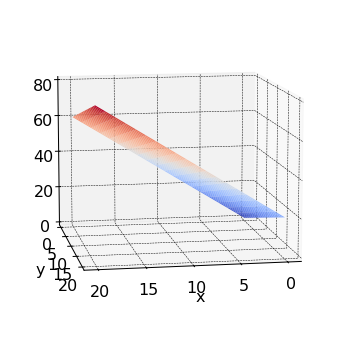

In [529]:
from matplotlib import cm
ax = plt.axes(projection = '3d')
ax.plot_surface(X,Y,f(X,Y),cmap=cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(10,80)

Define our train test

In [530]:
X_train = x_train

In [531]:
X_train, Y_train = np.meshgrid(X_train,y_train)
z = f(X_train,Y) + np.random.normal(2,0.5,(X_train.shape[0]))

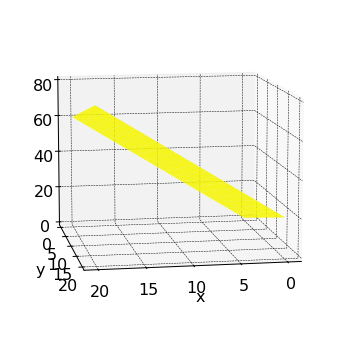

In [532]:
from matplotlib import cm
ax = plt.axes(projection = '3d')
ax.plot_surface(X_train,Y_train, f(X_train,Y),color ='yellow')
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(10,80)

The plane is given by z = $ax_1+bx_2+c$

In [533]:
x = X_train.flatten().reshape(-1,1)
y = Y_train.flatten().reshape(-1,1)
z = f(x,y)+np.random.normal(2,0.5,(x.shape[0]))

In [534]:
np.random.seed(1)
X_test = np.concatenate((np.ones((x.shape[0],1)),x,y),axis=1)
w = np.random.rand(3)
w, J = GD(X_test, z, w.reshape(-1,1), 1, 0.0001)

In [535]:
w

array([[2.05499106],
       [2.35527564],
       [1.64223173]])

In [536]:
def f_predict(X,Y,w):
    return w[0]+w[1]*X+w[2]*Y

In [537]:
w.shape

(3, 1)

In [538]:
z = f_predict(X,Y,w)

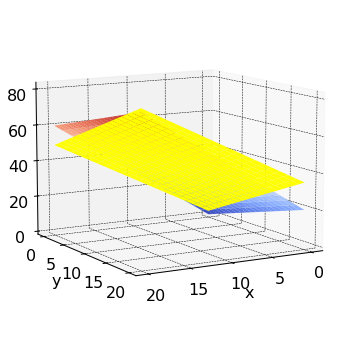

In [551]:
ax = plt.axes(projection = '3d')
ax.plot_surface(X_train,Y_train, f_predict(X_train,Y,w),color ='yellow')
ax.plot_surface(X_train,Y_train, f(X_train,Y),cmap=cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(10,60)

In [540]:
f(3,9)

18

In [541]:
f_predict(3,9,w)

array([23.90090355])

Conclude if the mean error is less than 10, significance level = 0.05 ?
\
H0: $\bar{x_1}-\bar{x_{predict}}>=10$
\
H1: $\bar{x_1}-\bar{x_{predict}}<10$

In [542]:
np.var(f(x,y))/np.var(f_predict(x,y,w))

1.212966850372861

=> $\sigma_1^2=\sigma_2^2$ => 2 sample testing

In [543]:
x1bar = np.mean(f(x,y))
x2bar = np.mean(f_predict(x,y,w))
v1 = np.var(f(x,y))
v2 = np.var(f(x,y))

In [544]:
n1 = n2 = len(f(x,y)) # = 400

In [545]:
s = ((n1-1)*v1+(n2-1)*v2)/(n1+n2-2)
se = np.sqrt(s*(1/n1+1/n2))

In [546]:
(x1bar-x2bar-5)/(se) # t0

-5.179670137970117

In [548]:
import scipy.stats as ttest
-ttest.t.ppf(q=1-0.025,df=798)

-1.9629411928266054

$t_0 < t_{0.025, df = 798}$ \
We conclude the mean of z and z-predict is less than 10

# Regularization for Logistic Regression

In [737]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("E:\\DownloadsOnE\\ex2data2.txt",sep=',',header=None)
df.columns=['Test result 1', 'Test result 2', 'Final Result']

In [738]:
df.head()

,Test result 1,Test result 2,Final Result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [739]:
X_1, X_2,  = np.array(df['Test result 1'].to_list()).reshape(-1,1), np.array(df['Test result 2'].to_list()).reshape(-1,1)
#test results for the microchips from two tests
X_train = np.concatenate((X_1,X_2),axis = 1) 
# merge them
Y_train = np.array(df['Final Result'].to_list()).reshape(-1,1) #=1 -> accepted, = 0 -> rejected

In [740]:
X_train[:5] #first five element of X

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])

In [741]:
Y_train[:5] #first five element of Y

array([[1],
       [1],
       [1],
       [1],
       [1]])

Plot the data

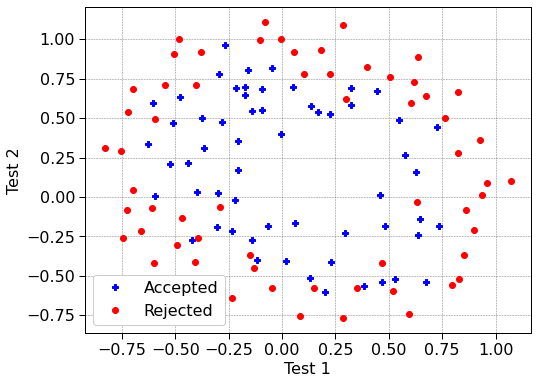

In [742]:
Xpass = X_train[Y_train[:,0]==1]
plt.plot(Xpass[:,0],Xpass[:,1],'P', c = 'blue', label = 'Accepted')
Xfail = X_train[Y_train[:,0]==0]
plt.plot(Xfail[:,0],Xfail[:,1],'o', c = 'red', label = 'Rejected')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(frameon = True)

Sigmoid function: \
$g(x) = \frac{1}{1+e^{-x}}$

In [743]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

One way to fit the data better is to create more features from each data point. We will define a function called feature mapping. we will map the features $x_1$ and $x_2$ into all polynomial terms of and up to the sixth power.
\
\begin{align*}
map(x) = \begin{pmatrix}
x_1 \\
x_2 \\
x_1^2 \\
x_1x_2\\
x_2^2\\
\vdots\\
x_1x_2^5\\
x_2^6
\end{pmatrix}
\end{align*}
\
This will return a 27x1 vector. In LR, it can lead to better non-linear boundary

In [744]:
def map_feature(X1,X2):
    X1 = np.atleast_1d(X1) #atleast_1d -> scalar must be turn to 1d vector
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1): #use loop to iterate
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [745]:
XMapped = map_feature(X_train[:,0],X_train[:,1])
print('Original shape: ', X_train.shape)
print('After Map featuring shape: ',XMapped.shape)

Original shape:  (118, 2)
After Map featuring shape:  (118, 27)


Cost function for Logistic Regression 
\
$J(w,b) = -\frac{Y^Tlog(\hat{Y})+(1-Y)^Tlog(1-\hat{Y})}{m}+\frac{\lambda}{2m}\sum (w1)^2$
\
$\hat{Y}=Xw, X \in R^{mxn}, w \in R{n}$

In [928]:
def cost_Logistic(X,y,w, lamb = 10):
    m,n = X.shape
    Yhat = sigmoid(X.dot(w))
    J = -(y.T.dot(np.log(Yhat))+(1-y.T).dot(np.log(1-Yhat)))/m
    wsum = np.sum(w**2)
    J = np.float64(J)
    J +=wsum*lamb/(2*m)
    return J

Example

In [929]:
np.random.seed(1)
initial_w = np.random.rand(XMapped.shape[1])
lambda_ = 1
cost = cost_Logistic(XMapped, Y_train, initial_w, lambda_)

print("Regularized cost :", cost)

Regularized cost : 1.0276152485347405


Next, we compute the gradient, given by:
\
$
\frac{\partial J}{\partial w} = \frac{1}{m}X^T(\hat{Y}-y)+\frac{\lambda}{m}w
$

In [930]:
def Gradient_LR(X, y,w,lambda_=10):
    fx = sigmoid(X.dot(w))
    m = X.shape[0]
    w = w.reshape(-1,1)
    error = fx.reshape(-1,1)-y
    grad = X.T.dot(error)
    grad = grad+lambda_*w/m
    return grad

In [931]:
Gradient_LR(XMapped, Y_train, initial_w, 10)

array([[ 7.08262916],
       [11.38873603],
       [10.52002802],
       [ 2.80763024],
       [12.21702336],
       [ 5.30218325],
       [ 2.91500918],
       [ 1.81072069],
       [ 9.95352309],
       [ 7.61820055],
       [ 1.04579083],
       [ 2.8470691 ],
       [ 0.91056497],
       [10.58209341],
       [ 4.7544197 ],
       [ 1.422907  ],
       [ 0.86921459],
       [ 1.70585555],
       [ 0.82494845],
       [ 9.2821413 ],
       [ 6.01334367],
       [ 0.67675985],
       [ 1.26702636],
       [ 0.36016392],
       [ 1.65396145],
       [ 0.45461947],
       [ 9.66601037]])

In [943]:
def GDLR(X, y, w_in, lambda_=1,alpha=0.002): #GradientDescent
    w = w_in
    J = []
    m = X.shape[0]
    for i in range(100000):
        djdw = Gradient_LR(X,y,w,lambda_)
        w = (1-alpha*lambda_/m)*w.reshape(-1,1)-alpha*(djdw)
        J.append(cost_Logistic(X,y,w,lambda_))
    return w,J

The main part

In [944]:
np.random.seed(1)
initial_w = np.random.rand(XMapped.shape[1])
lambda_ = 0.01
w,J = GDLR(XMapped,Y_train, initial_w,lambda_)

In [945]:
w

array([[ -1.7056274 ],
       [  1.75472566],
       [  9.15299605],
       [ -7.09990815],
       [  9.33147449],
       [ 10.49861535],
       [  5.14878165],
       [  7.68935964],
       [  0.84040376],
       [-14.3821748 ],
       [  2.48726999],
       [-22.13289468],
       [  0.69235015],
       [-21.20738183],
       [ -2.89522333],
       [ -1.4722336 ],
       [  6.7140943 ],
       [ -8.66605812],
       [-10.12061715],
       [  7.83021879],
       [-14.47042614],
       [ -1.08649914],
       [ -7.63401348],
       [  6.37363037],
       [-13.46838285],
       [ -7.37096366],
       [ -2.27955897]])

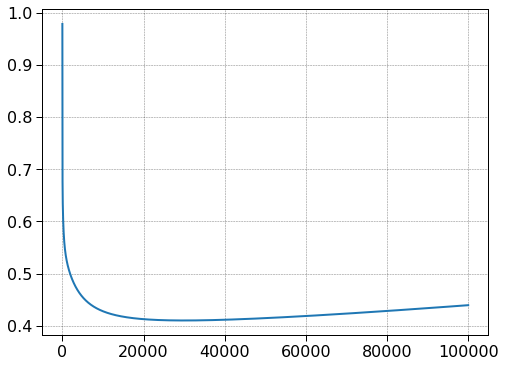

In [946]:
plt.plot(J[:])

It seems like the error keeps increasing

In [947]:
Y_pred = sigmoid(XMapped.dot(w))

In [948]:
Y_pred[Y_pred>0.5]=1
Y_pred[Y_pred<0.5]=0

In [949]:
print('Train accuracy: {}'.format(Y_train[Y_train==Y_pred].size/Y_train.size*100))

Train accuracy: 83.89830508474576


In [962]:
def plot_classifier(X,y,w):
    u = np.linspace(-1.5, 1.5, 10)
    v = np.linspace(-1.5, 1.5, 10) 
    z = np.zeros((len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w))  #see them as meshgrid
    z = z.T
    plt.contour(u,v,z, levels = [0.5], colors="g")

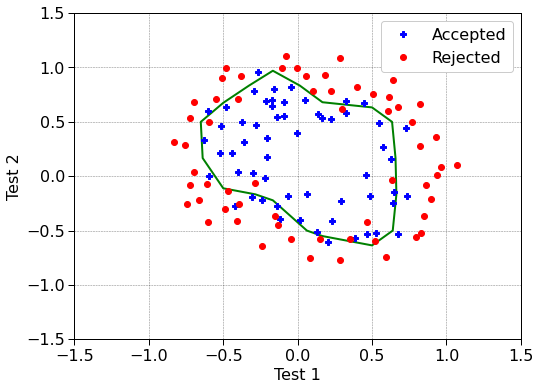

In [963]:
import warnings

#suppress warnings
warnings.filterwarnings('ignore')
plot_classifier(XMapped,y_train, w)
Xpass = X_train[Y_train[:,0]==1]
plt.plot(Xpass[:,0],Xpass[:,1],'P', c = 'blue', label = 'Accepted')
Xfail = X_train[Y_train[:,0]==0]
plt.plot(Xfail[:,0],Xfail[:,1],'o', c = 'red', label = 'Rejected')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(frameon = True)

The result seems to be acceptable